<a href="https://colab.research.google.com/github/na-learning/Stock-Prediction/blob/main/Stock_prediction_logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [85]:
!pip install yfinance
!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
!tar xvzf ta-lib-0.4.0-src.tar.gz
import os
os.chdir('ta-lib') # Can't use !cd in co-lab
!./configure --prefix=/usr
!make
!make install
os.chdir('../')
!pip install TA-Lib

--2024-07-18 23:26:16--  http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
Resolving prdownloads.sourceforge.net (prdownloads.sourceforge.net)... 204.68.111.105
Connecting to prdownloads.sourceforge.net (prdownloads.sourceforge.net)|204.68.111.105|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2024-07-18 23:26:16--  http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving downloads.sourceforge.net (downloads.sourceforge.net)... 204.68.111.105
Reusing existing connection to prdownloads.sourceforge.net:80.
HTTP request sent, awaiting response... 302 Found
Location: http://psychz.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz?viasf=1 [following]
--2024-07-18 23:26:16--  http://psychz.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz?viasf=1
Resolving p

In [86]:
import numpy as np
import pandas as pd
import yfinance as yf
import talib as ta
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score

In [87]:
df = yf.Ticker('TSLA').history(period="max")
# df = yf.download('AAPL','2005-01-01', '2023-12-30')
df = df.drop(columns=['Dividends','Stock Splits'])
df

,Open,High,Low,Close,Volume
Date,,,,,
2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500
2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500
2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000
2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000
2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500
...,...,...,...,...,...
2024-07-12 00:00:00-04:00,235.800003,251.839996,233.089996,248.229996,155694400
2024-07-15 00:00:00-04:00,255.970001,265.600006,251.729996,252.639999,146912900
2024-07-16 00:00:00-04:00,255.309998,258.619995,245.800003,256.559998,126332500


In [88]:
df['S_10'] = df['Close'].rolling(window=10).mean()
df['Corr'] = df['Close'].rolling(window=10).corr(df['S_10'])
df['RSI'] = ta.RSI(np.array(df['Close']), timeperiod =10)
df['High-Low-Percentage'] = ((df['High'].shift(1) - df['Low'].shift(1))/df['Low'].shift(1)) * 100
df['Open-Close-Percentage'] = ((df['Open'].shift(1) - df['Close'].shift(1))/df['Open'].shift(1)) * 100
df.index = df.index.date
df = df.dropna()
X = X = df[['Open', 'High', 'Low', 'Volume', 'S_10', 'Corr', 'RSI', 'High-Low-Percentage', 'Open-Close-Percentage']]
X

,Open,High,Low,Volume,S_10,Corr,RSI,High-Low-Percentage,Open-Close-Percentage
2010-07-26,1.433333,1.433333,1.353333,13833000,1.361200,0.186448,43.771926,2.374141,-0.471870
2010-07-27,1.394000,1.412000,1.350667,9295500,1.377267,0.215493,41.732432,5.911335,2.558096
2010-07-28,1.370000,1.393333,1.367333,7008000,1.383133,0.113102,42.986814,4.540937,1.721668
2010-07-29,1.384667,1.392000,1.333333,9240000,1.386200,-0.230016,40.859614,1.901505,-0.827225
2010-07-30,1.346667,1.362667,1.303333,6403500,1.381533,-0.436291,38.512985,4.400022,2.022147
...,...,...,...,...,...,...,...,...,...
2024-07-12,235.800003,251.839996,233.089996,155694400,240.470000,0.722786,68.390475,13.081580,8.458029
2024-07-15,255.970001,265.600006,251.729996,146912900,245.945999,0.614622,70.316193,8.044103,-5.271413
2024-07-16,255.309998,258.619995,245.800003,126332500,250.615999,0.454251,72.000896,5.509876,1.300934
2024-07-17,252.729996,258.470001,246.179993,115584800,252.339999,0.022269,63.736714,5.215619,-0.489601


In [89]:
y = np.where(df['Close'].shift(-1) > df['Close'], 1, -1)
y

array([-1,  1, -1, ..., -1,  1, -1])

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, shuffle = False, random_state=3)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(2991, 9)
(2991,)
(528, 9)
(528,)


In [91]:
lr = LogisticRegression()
lr = lr.fit(X_train,y_train)

In [92]:
pd.DataFrame(zip(X.columns, np.transpose(lr.coef_)))

,0,1
0,Open,[6.325340412791651e-16]
1,High,[6.36283843771616e-16]
2,Low,[6.172672288499231e-16]
3,Volume,[5.621258818403339e-10]
4,S_10,[6.239643163764332e-16]
5,Corr,[4.182701800841157e-18]
6,RSI,[3.10634965725462e-16]
7,High-Low-Percentage,[5.534730192133753e-17]
8,Open-Close-Percentage,[-2.344402157659052e-18]


In [93]:
start_date = df.index.min()
end_date = df.index.max()

# Create a list containing the start and end dates
prediction_date = [start_date, end_date]
# prediction_date = pd.date_range(start=start_date, end=end_date).to_numpy()
# print(prediction_date.size)
print(prediction_date)
# Use the list of dates for prediction
probability = lr.predict_proba(X_test)
print(probability)

[datetime.date(2010, 7, 26), datetime.date(2024, 7, 18)]
[[0.48629647 0.51370353]
 [0.48556196 0.51443804]
 [0.48623298 0.51376702]
 ...
 [0.48225377 0.51774623]
 [0.48376241 0.51623759]
 [0.48448606 0.51551394]]


In [94]:
predicted = lr.predict(X_test)
print(predicted)

print(set(predicted))

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 

In [95]:
# Define predicted_labels as buy signal (1)
predicted_labels = 1

# Find the dates with predicted buy signals (Signal = 1)
buy_signal_dates = prediction_date[predicted_labels == 1]

# Print the date(s) with buy signal(s)
print("\nDate(s) with Buy Signal(s):")
print(buy_signal_dates)
# print(buy_signal_dates.size)


Date(s) with Buy Signal(s):
2024-07-18


In [96]:
print(metrics.confusion_matrix(y_test, predicted))

[[  0 255]
 [  0 273]]


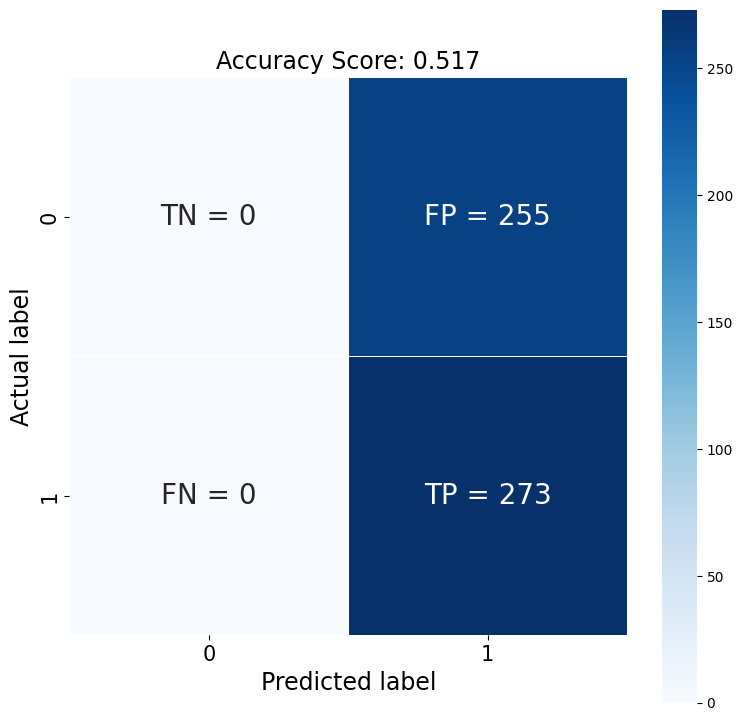

In [97]:
import seaborn as sns

modified_cm = []
for index,value in enumerate(metrics.confusion_matrix(y_test, predicted)):
    if index == 0:
        modified_cm.append(['TN = ' + str(value[0]), 'FP = ' + str(value[1])])
    if index == 1:
        modified_cm.append(['FN = ' + str(value[0]), 'TP = ' + str(value[1])])

plt.figure(figsize=(9,9))
sns.heatmap(metrics.confusion_matrix(y_test, predicted), annot=np.array(modified_cm),
            fmt="",
            annot_kws={"size": 20},
            linewidths=.5,
            square = True,
            cmap = 'Blues'
            );

plt.ylabel('Actual label', fontsize = 17);
plt.xlabel('Predicted label', fontsize = 17);
plt.title('Accuracy Score: {:.3f}'.format(lr.score(X_test, y_test)), size = 17);
plt.tick_params(labelsize= 15)

In [98]:
print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

          -1       0.00      0.00      0.00       255
           1       0.52      1.00      0.68       273

    accuracy                           0.52       528
   macro avg       0.26      0.50      0.34       528
weighted avg       0.27      0.52      0.35       528



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
